## **Reporte** - Fuentes de Información
* 7 de Marzo del 2025
#### ESCOM - IPN: *Modelado Predictivo*
#### Prof. Claudia Blanquel

#### *Lic. Ciencia de Datos* - 6AM1

> Armas Ramirez Daniel

> Gutierrez Ramirez Alana Sofia

> Hernández Peña Irving Jafet

> Reyes Maldonado Oscar Romario

> Sanchez Garcia Miguel Alexander

#### **0° Intro**

Data obtained from:

> https://www.inegi.org.mx/programas/enigh/nc/2016/#datos_abiertos

**a.** Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

* Extract the data (already filtered) from the source

In [2]:
data = pd.read_csv('filtered_data/enigh_filtered.csv')

categorical_columns = []
with open('filtered_data/categorical_columns.txt', 'r') as f:
    for line in f:
        categorical_columns.append(line.strip())

numerical_columns = []
with open('filtered_data/numerical_columns.txt', 'r') as f:
    for line in f:
        numerical_columns.append(line.strip())



#### **1° EDA (Exploratory Data Analysis)**

##### *General Data*

**a.** Let´s check the **dimensions** of the dataset

In [3]:
print('Rows: ' + str(data.shape[0]))
print('Columns: ' + str(data.shape[1]))

Rows: 69169
Columns: 63


**b.** Check the first **10 rows**

In [4]:
data.head(10)

,folioviv,acc_alim1,acc_alim2,telefono,celular,tv_paga,conex_inte,num_auto,num_van,num_pickup,...,viv_usada,tipo_finan,escrituras,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio
0,100146202,2,2,1,1,1,1,0,1,0,...,1,5,1,3,1,2,1,10010000,1,3
1,100146204,2,2,2,1,2,1,0,0,0,...,,,,4,3,1,4,10010000,1,3
2,100146205,2,2,1,2,1,1,1,0,0,...,1,3,1,2,0,2,1,10010000,1,3
3,100146206,1,2,1,1,2,1,0,0,0,...,,,,2,0,2,1,10010000,1,3
4,100159301,1,2,1,1,1,1,3,0,1,...,2,5,1,5,4,1,1,10010000,1,3
5,100159302,2,1,1,1,2,2,0,0,0,...,,,,2,0,2,1,10010000,1,3
6,100159303,2,2,2,1,1,2,0,0,0,...,1,1,1,1,0,1,1,10010000,1,3
7,100159304,2,2,1,1,2,1,0,0,0,...,,,1,5,3,2,1,10010000,1,3
8,100159305,2,2,1,1,1,1,0,0,0,...,1,1,1,3,1,2,1,10010000,1,3
9,100177801,2,2,1,1,2,1,1,0,0,...,,5,1,5,3,2,1,10010000,1,3


**c.** Check the last **10 rows**

In [5]:
data.tail(10)

,folioviv,acc_alim1,acc_alim2,telefono,celular,tv_paga,conex_inte,num_auto,num_van,num_pickup,...,viv_usada,tipo_finan,escrituras,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio
69159,3260801319,1,2,1,1,2,1,0,1,0,...,,3,1,2,1,1,1,320580000,4,2
69160,3260801320,2,2,2,1,2,2,0,0,0,...,,5,1,4,2,2,1,320580000,4,2
69161,3260801321,2,2,2,1,2,2,0,0,1,...,,,,5,2,3,1,320580000,4,2
69162,3260801322,2,2,2,1,2,2,0,0,0,...,,,,3,1,2,1,320580000,4,2
69163,3260801323,2,2,1,2,2,2,0,0,0,...,1,5,2,1,1,0,1,320580000,4,2
69164,3260801324,2,2,2,1,1,2,0,0,0,...,,5,1,4,2,2,1,320580000,4,2
69165,3260801902,2,2,1,2,1,2,0,0,0,...,,,,1,0,1,1,320580000,4,2
69166,3260801904,2,2,2,2,2,2,0,0,0,...,,5,1,1,1,0,1,320580000,4,2
69167,3260801905,2,2,1,2,1,1,1,0,0,...,,5,1,3,1,2,1,320580000,4,2
69168,3260801906,1,2,1,2,1,1,0,0,1,...,,,,5,2,3,1,320580000,4,2


**d.** Get the **info** of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69169 entries, 0 to 69168
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   folioviv      69169 non-null  int64  
 1   acc_alim1     69169 non-null  int64  
 2   acc_alim2     69169 non-null  int64  
 3   telefono      69169 non-null  int64  
 4   celular       69169 non-null  int64  
 5   tv_paga       69169 non-null  int64  
 6   conex_inte    69169 non-null  int64  
 7   num_auto      69169 non-null  int64  
 8   num_van       69169 non-null  int64  
 9   num_pickup    69169 non-null  int64  
 10  num_moto      69169 non-null  int64  
 11  num_otro      69169 non-null  int64  
 12  num_tvd       69169 non-null  int64  
 13  num_compu     69169 non-null  int64  
 14  consumo       48852 non-null  float64
 15  regalotar     69169 non-null  int64  
 16  regalodado    69169 non-null  int64  
 17  est_alim      69169 non-null  int64  
 18  est_trans     69169 non-nu

In [7]:
print('Variables categoricas: ')
print(categorical_columns)

print('Variables numericas: ')
print(numerical_columns)

Variables categoricas: 
['acc_alim1', 'acc_alim2', 'telefono', 'celular', 'tv_paga', 'conex_inte', 'consumo', 'regalotar', 'regalodado', 'diconsa', 'id_trabajo', 'trapais', 'pago', 'sinco', 'scian', 'clas_emp', 'tam_emp', 'dis_agua', 'disp_elect', 'tenencia', 'pago_mesp', 'tipo_adqui', 'viv_usada', 'tipo_finan', 'escrituras', 'ubica_geo', 'tam_loc', 'est_socio']
Variables numericas: 
['num_auto', 'num_van', 'num_pickup', 'num_moto', 'num_otro', 'num_tvd', 'num_compu', 'est_alim', 'est_trans', 'otro_pago', 'ero_1', 'ero_2', 'ero_3', 'ero_4', 'ero_5', 'ero_6', 'gasto_df', 'gasto_tri_df', 'pago_mp', 'ing_1', 'ing_2', 'ing_3', 'ing_4', 'ing_5', 'ing_6', 'ing_tri', 'htrab', 'antiguedad', 'renta', 'estim_pago', 'pago_viv', 'tot_hom', 'tot_muj', 'tot_hog']


##### *Numeric Analysis*

**e.** **Describing** the dataset

In [8]:
# Show all columns
pd.set_option('display.max_columns', None)
data[numerical_columns].describe()

,num_auto,num_van,num_pickup,num_moto,num_otro,num_tvd,num_compu,est_alim,est_trans,otro_pago,ero_1,ero_2,ero_3,ero_4,ero_5,ero_6,gasto_df,gasto_tri_df,pago_mp,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri,htrab,tot_hom,tot_muj,tot_hog
count,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000,69169.000000,30731.000000,30731.000000,30731.000000,3.073100e+04,3.073100e+04,30731.000000,43093.000000,43093.000000,4383.000000,6.912600e+04,6.912600e+04,6.912600e+04,6.912600e+04,6.912600e+04,6.912600e+04,6.912600e+04,63122.000000,69169.000000,69169.000000,69169.000000
mean,0.318611,0.140930,0.139716,0.090676,0.001995,0.875074,0.306828,2949.809062,350.008038,5.106608,2150.759754,1638.984283,1692.907195,1.513379e+03,1.492335e+03,1416.596303,110.515095,302.099878,887.088296,4.410023e+03,3.358228e+03,3.303001e+03,3.221918e+03,3.202939e+03,3.194422e+03,9.963602e+03,46.119293,1.821119,1.906056,1.016510
std,0.579954,0.395225,0.393714,0.319920,0.053466,0.822209,0.621316,1947.899613,541.711357,49.282212,8264.822235,6345.275950,10140.847869,1.238530e+04,2.141705e+04,7278.717018,400.067150,486.772759,4560.780444,1.646108e+04,1.234805e+04,1.089751e+04,1.087939e+04,1.066782e+04,1.174952e+04,3.159283e+04,18.882618,1.184318,1.231769,0.145343
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,2.900000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e-01,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,0.000000,0.000000,235.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,46.000000,133.540000,0.000000,5.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.044190e+03,36.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2500.000000,144.000000,0.000000,998.000000,450.000000,400.000000,2.870000e+02,2.000000e+02,200.000000,80.000000,232.250000,0.000000,2.000000e+03,1.000000e+03,1.000000e+03,9.500000e+02,1.000000e+03,8.000000e+02,3.480660e+03,48.000000,2.000000,2.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3900.000000,500.000000,0.000000,2000.000000,1500.000000,1400.000000,1.200000e+03,1.165500e+03,1090.000000,120.000000,360.000000,567.500000,5.000000e+03,4.160000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,1.186428e+04,56.000000,2.000000,3.000000,1.000000
max,11.000000,12.000000,10.000000,10.000000,4.000000,12.000000,15.000000,35576.000000,11272.000000,999.000000,800000.000000,450000.000000,900000.000000,1.500000e+06,3.600000e+06,600000.000000,50000.000000,46451.610000,201500.000000,2.533957e+06,1.440200e+06,1.445200e+06,1.445200e+06,1.437200e+06,1.453200e+06,4.222761e+06,168.000000,12.000000,14.000000,5.000000


**f.** Let´s check the **number and percentage of the null values** for each dimension

In [9]:
# Show null values including cells with spaces or empty strings
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
# Print the number of null values in each column (not truncated)
pd.set_option('display.max_rows', None)
data.isnull().sum()

folioviv            0
acc_alim1           0
acc_alim2           0
telefono            0
celular             0
tv_paga             0
conex_inte          0
num_auto            0
num_van             0
num_pickup          0
num_moto            0
num_otro            0
num_tvd             0
num_compu           0
consumo         20317
regalotar           0
regalodado          0
est_alim            0
est_trans           0
diconsa             0
otro_pago           0
ero_1           38438
ero_2           38438
ero_3           38438
ero_4           38438
ero_5           38438
ero_6           38438
gasto_df        26076
gasto_tri_df    26076
pago_mp         64786
ing_1              43
ing_2              43
ing_3              43
ing_4              43
ing_5              43
ing_6              43
ing_tri            43
trapais          6047
pago            23150
htrab            6047
sinco            6047
scian            6047
clas_emp        27384
tam_emp          6047
antiguedad      10817
disp_agua 

In [10]:
data.isnull().sum() / data.shape[0] * 100

folioviv         0.000000
acc_alim1        0.000000
acc_alim2        0.000000
telefono         0.000000
celular          0.000000
tv_paga          0.000000
conex_inte       0.000000
num_auto         0.000000
num_van          0.000000
num_pickup       0.000000
num_moto         0.000000
num_otro         0.000000
num_tvd          0.000000
num_compu        0.000000
consumo         29.372985
regalotar        0.000000
regalodado       0.000000
est_alim         0.000000
est_trans        0.000000
diconsa          0.000000
otro_pago        0.000000
ero_1           55.571137
ero_2           55.571137
ero_3           55.571137
ero_4           55.571137
ero_5           55.571137
ero_6           55.571137
gasto_df        37.698969
gasto_tri_df    37.698969
pago_mp         93.663346
ing_1            0.062167
ing_2            0.062167
ing_3            0.062167
ing_4            0.062167
ing_5            0.062167
ing_6            0.062167
ing_tri          0.062167
trapais          8.742356
pago        

**g.** Let´s check the number of **duplicated values** of each dimension

In [11]:
duplicate_sums = data.apply(lambda col: col.duplicated().sum())
print(duplicate_sums)

folioviv            0
acc_alim1       69167
acc_alim2       69167
telefono        69167
celular         69167
tv_paga         69167
conex_inte      69167
num_auto        69157
num_van         69157
num_pickup      69160
num_moto        69161
num_otro        69164
num_tvd         69157
num_compu       69158
consumo         69166
regalotar       69167
regalodado      69167
est_alim        67039
est_trans       68119
diconsa         69166
otro_pago       69036
ero_1           66908
ero_2           67098
ero_3           67166
ero_4           67225
ero_5           67257
ero_6           67268
gasto_df        68606
gasto_tri_df    68122
pago_mp         68622
ing_1           64839
ing_2           65104
ing_3           65154
ing_4           65194
ing_5           65207
ing_6           65197
ing_tri         59449
trapais         69166
pago            69165
htrab           69035
sinco           68716
scian           69004
clas_emp        69164
tam_emp         69156
antiguedad      69070
disp_agua 

##### *Univariate Analysis*

In [12]:
# Set default plot color to black
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black'])

**a.** For incomes features

##### *Multivariate Analysis*

**h.** **Distribution** of each numeric dimension

**i.** **Relationship** Analysis between numeric features

**j.** **Heatmap** of numeric features

In [13]:
# Analisis univariable de los gastos por vivienda
gastos_columnas = ['est_alim', 'est_trans', 'otro_pago', 'ero_1', 'ero_2', 'ero_3', 'ero_4', 'ero_5', 'ero_6', 'gasto_df',
                    'pago_mp']
gastos_data = data[gastos_columnas]
gastos_data.describe()

,est_alim,est_trans,otro_pago,ero_1,ero_2,ero_3,ero_4,ero_5,ero_6,gasto_df,pago_mp
count,69169.000000,69169.000000,69169.000000,30731.000000,30731.000000,30731.000000,3.073100e+04,3.073100e+04,30731.000000,43093.000000,4383.000000
mean,2949.809062,350.008038,5.106608,2150.759754,1638.984283,1692.907195,1.513379e+03,1.492335e+03,1416.596303,110.515095,887.088296
std,1947.899613,541.711357,49.282212,8264.822235,6345.275950,10140.847869,1.238530e+04,2.141705e+04,7278.717018,400.067150,4560.780444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000
25%,1600.000000,0.000000,0.000000,235.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,46.000000,0.000000
50%,2500.000000,144.000000,0.000000,998.000000,450.000000,400.000000,2.870000e+02,2.000000e+02,200.000000,80.000000,0.000000
75%,3900.000000,500.000000,0.000000,2000.000000,1500.000000,1400.000000,1.200000e+03,1.165500e+03,1090.000000,120.000000,567.500000
max,35576.000000,11272.000000,999.000000,800000.000000,450000.000000,900000.000000,1.500000e+06,3.600000e+06,600000.000000,50000.000000,201500.000000


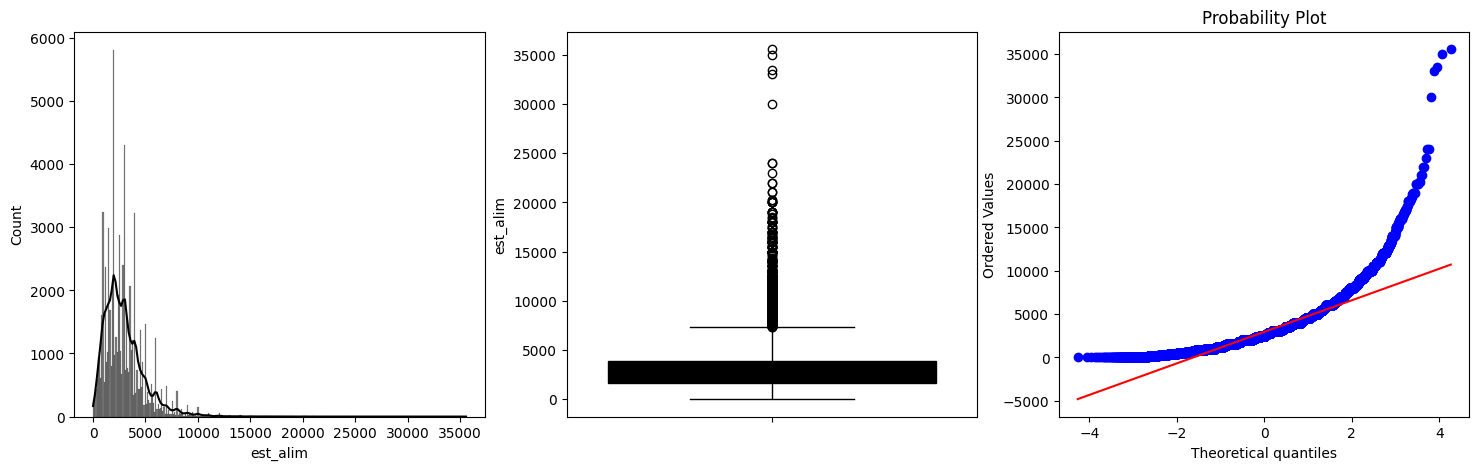

In [14]:
# Funcion para graficar histogramas, boxplots y qqplots
def plot_distribution(data, column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    sns.histplot(data[column], kde=True, ax=axes[0])
    sns.boxplot(y=data[column], ax=axes[1])
    stats.probplot(data[column], dist="norm", plot=axes[2])
    plt.show()

# Graficar la distribucion de los gastos de alimentacion
plot_distribution(gastos_data, 'est_alim')

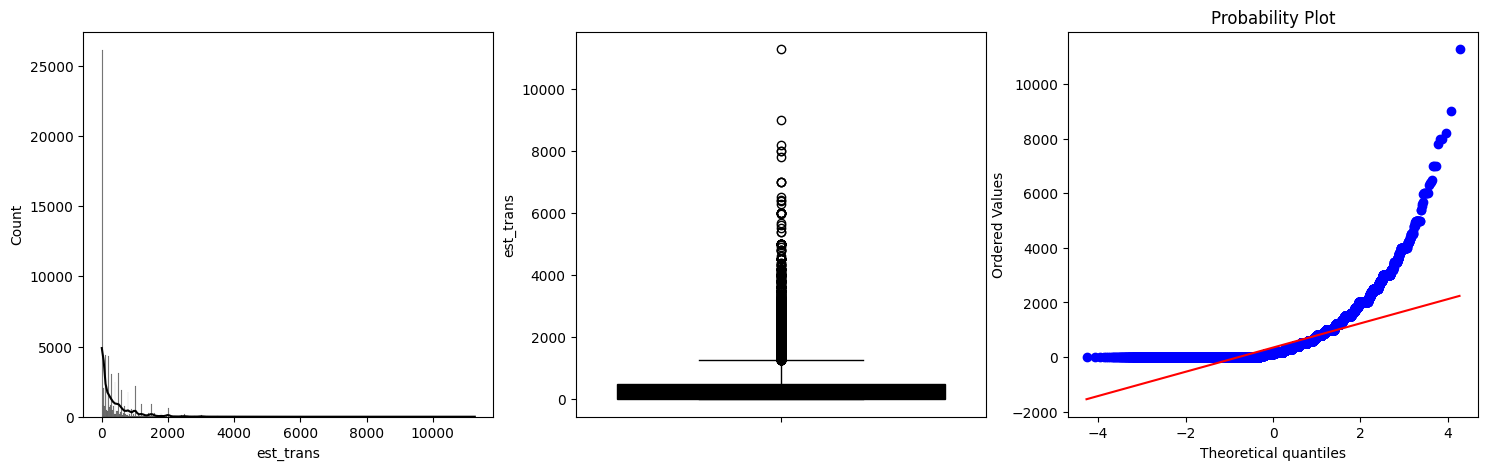

In [15]:
# Graficar la distribucion de los gastos de transporte
plot_distribution(gastos_data, 'est_trans')

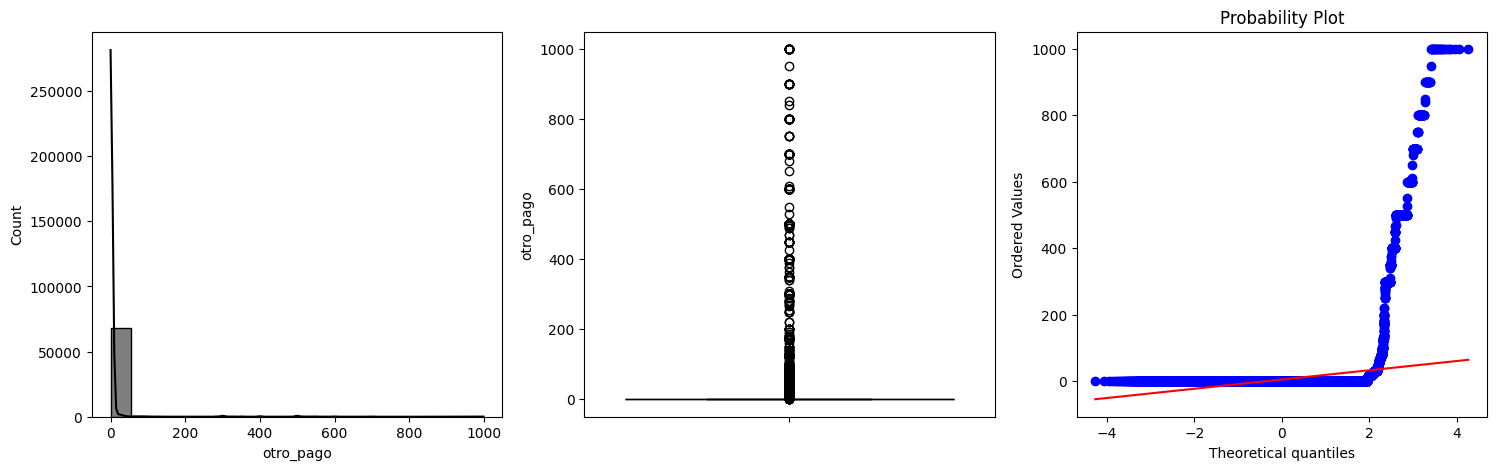

In [16]:
# Graficar la distribucion de los gastos de otros pagos
plot_distribution(gastos_data, 'otro_pago')

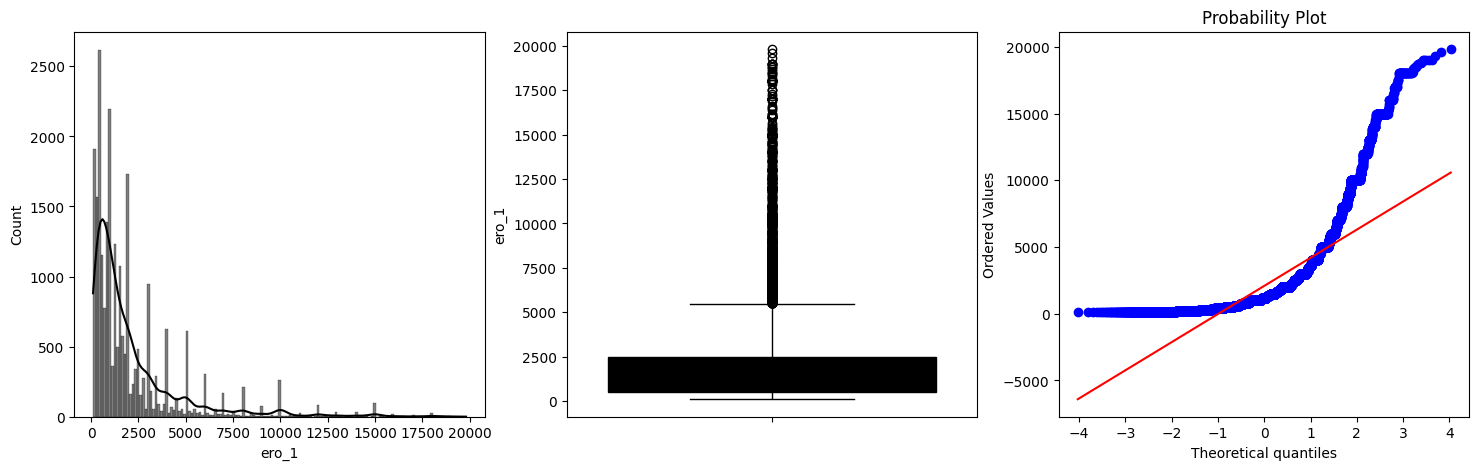

In [17]:
# Elegir solo los datos de ero_1 que sean menores a 20000 y mayores a 100
gastos_data = gastos_data[(gastos_data['ero_1'] < 20000) & (gastos_data['ero_1'] > 100)]

plot_distribution(gastos_data, 'ero_1')

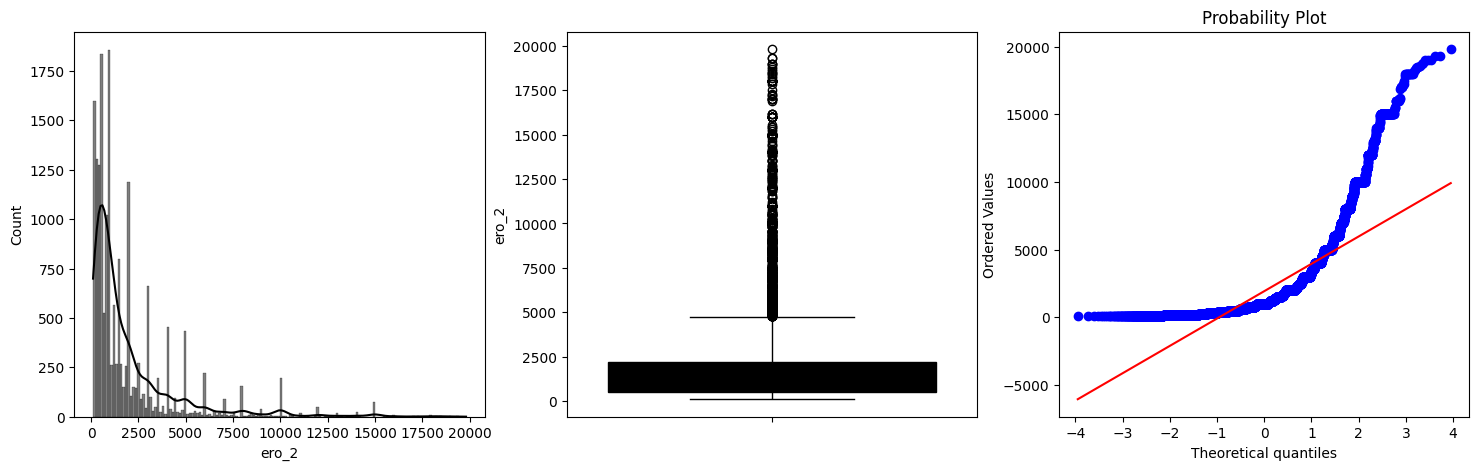

In [18]:
# Elegir solo los datos de ero_2 que sean menores a 20000 y mayores a 100
gastos_data = gastos_data[(gastos_data['ero_2'] < 20000) & (gastos_data['ero_2'] > 100)]

plot_distribution(gastos_data, 'ero_2')

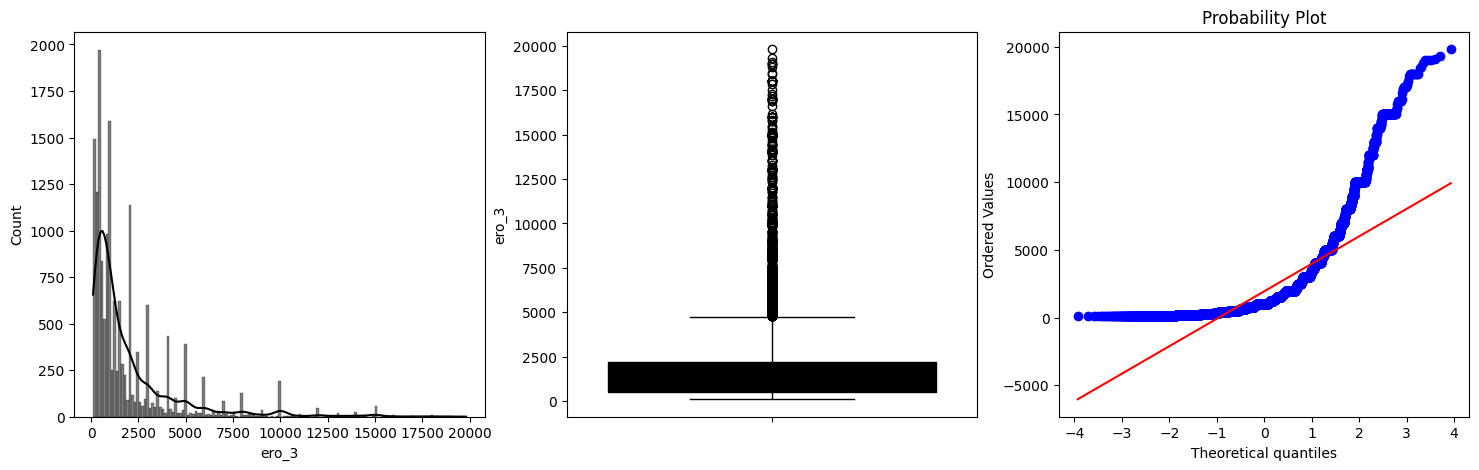

In [19]:
# Elegir solo los datos de ero_3 que sean menores a 20000 y mayores a 100
gastos_data = gastos_data[(gastos_data['ero_3'] < 20000) & (gastos_data['ero_3'] > 100)]

plot_distribution(gastos_data, 'ero_3')

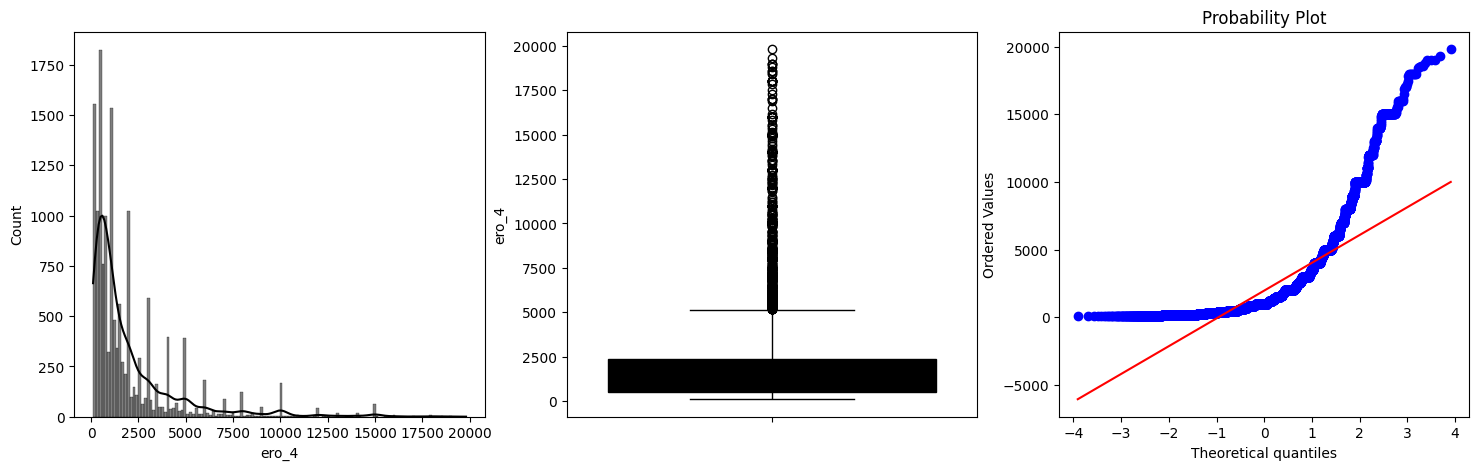

In [20]:
# Elegir solo los datos de ero_4 que sean menores a 20000 y mayores a 100
gastos_data = gastos_data[(gastos_data['ero_4'] < 20000) & (gastos_data['ero_4'] > 100)]

plot_distribution(gastos_data, 'ero_4')

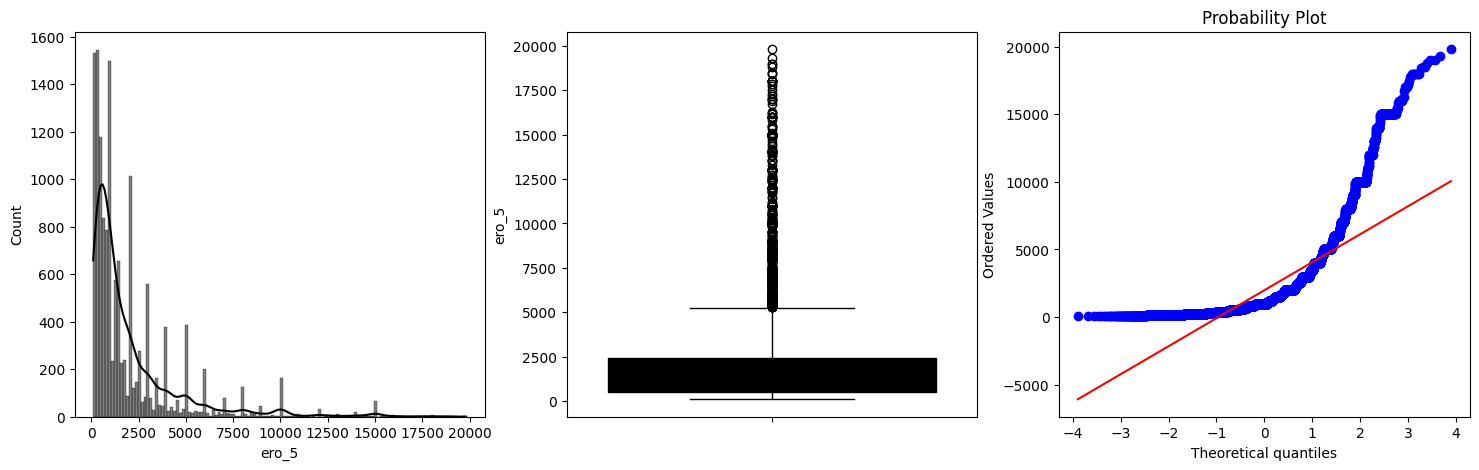

In [21]:
# Elegir solo los datos de ero_5 que sean menores a 20000 y mayores a 100
gastos_data = gastos_data[(gastos_data['ero_5'] < 20000) & (gastos_data['ero_5'] > 100)]

plot_distribution(gastos_data, 'ero_5')

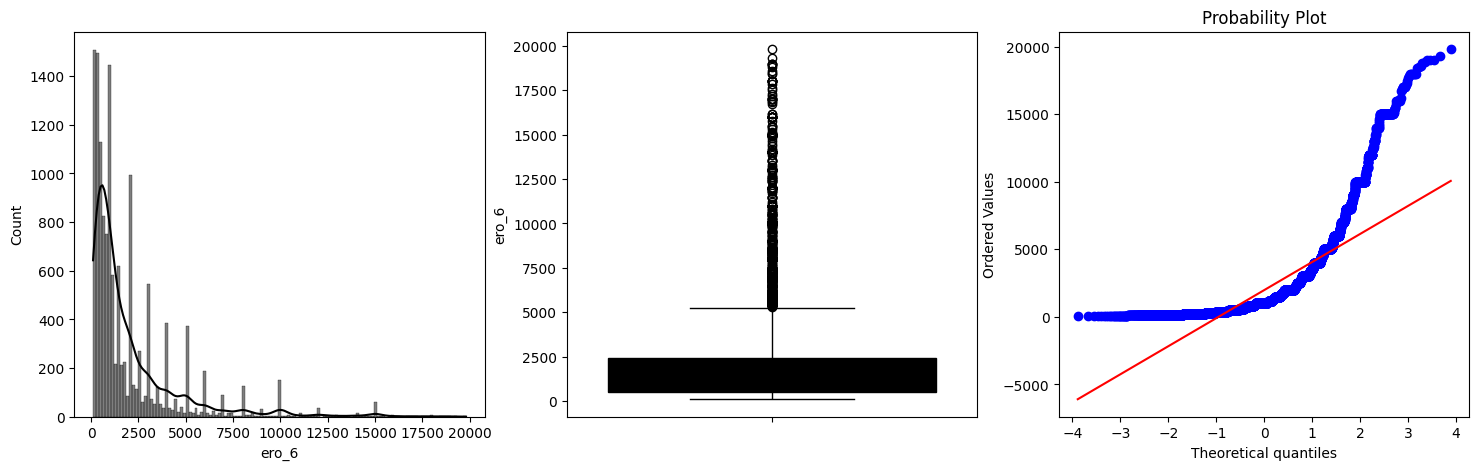

In [22]:
# Elegir solo los datos de ero_6 que sean menores a 20000 y mayores a 100
gastos_data = gastos_data[(gastos_data['ero_6'] < 20000) & (gastos_data['ero_6'] > 100)]

plot_distribution(gastos_data, 'ero_6')

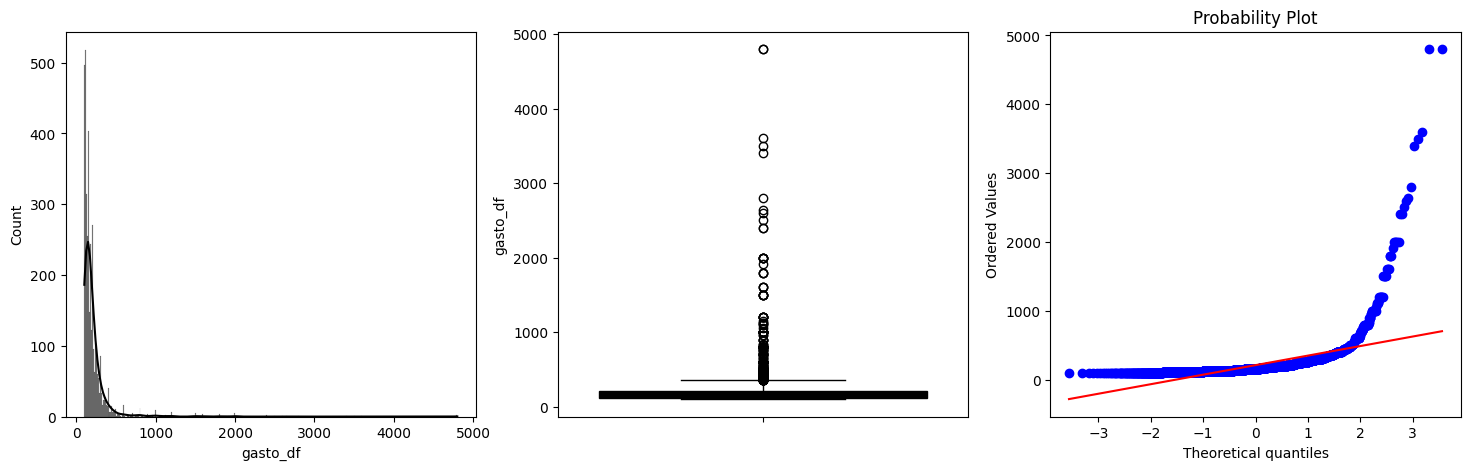

In [23]:
# Graficar la distribucion de gastodf
gastos_data = gastos_data[(gastos_data['gasto_df'] < 5000) & (gastos_data['gasto_df'] > 100)]
plot_distribution(gastos_data, 'gasto_df')

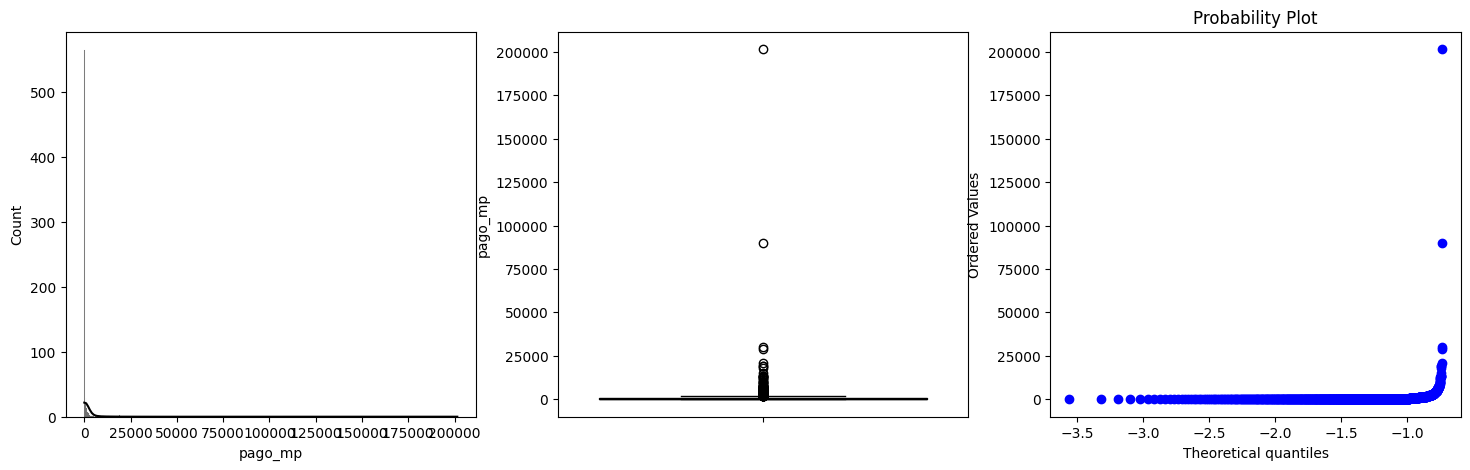

In [24]:
# Graaficar la distribucion de pago_mp
#gastos_data = gastos_data[gastos_data['pago_mp']<5000 & (gastos_data['pago_mp']>100)]
plot_distribution(gastos_data, 'pago_mp')

In [25]:
# Sumar los gastos de cada hogar
gastos_data['gasto_total'] = gastos_data.sum(axis=1)
gastos_data.describe()

,est_alim,est_trans,otro_pago,ero_1,ero_2,ero_3,ero_4,ero_5,ero_6,gasto_df,pago_mp,gasto_total
count,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,3744.000000,866.000000,3744.000000
mean,4483.934562,409.402244,5.281250,2556.631143,2459.438301,2455.704327,2421.012821,2422.505609,2405.022703,211.035791,1281.528868,20126.390759
std,2582.944379,630.549166,53.305532,3045.752289,2954.999340,2941.026092,2890.951828,2921.097993,2920.803650,235.112831,7925.224685,18727.865443
min,0.000000,0.000000,0.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,101.000000,0.000000,1564.000000
25%,2800.000000,0.000000,0.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,121.000000,0.000000,8466.000000
50%,4000.000000,150.000000,0.000000,1500.000000,1427.000000,1420.000000,1400.000000,1400.000000,1340.000000,160.000000,0.000000,13872.500000
75%,5600.000000,600.000000,0.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,216.000000,700.000000,24341.000000
max,35000.000000,8000.000000,999.000000,19816.000000,19816.000000,19816.000000,19816.000000,19816.000000,19816.000000,4800.000000,201500.000000,222400.000000


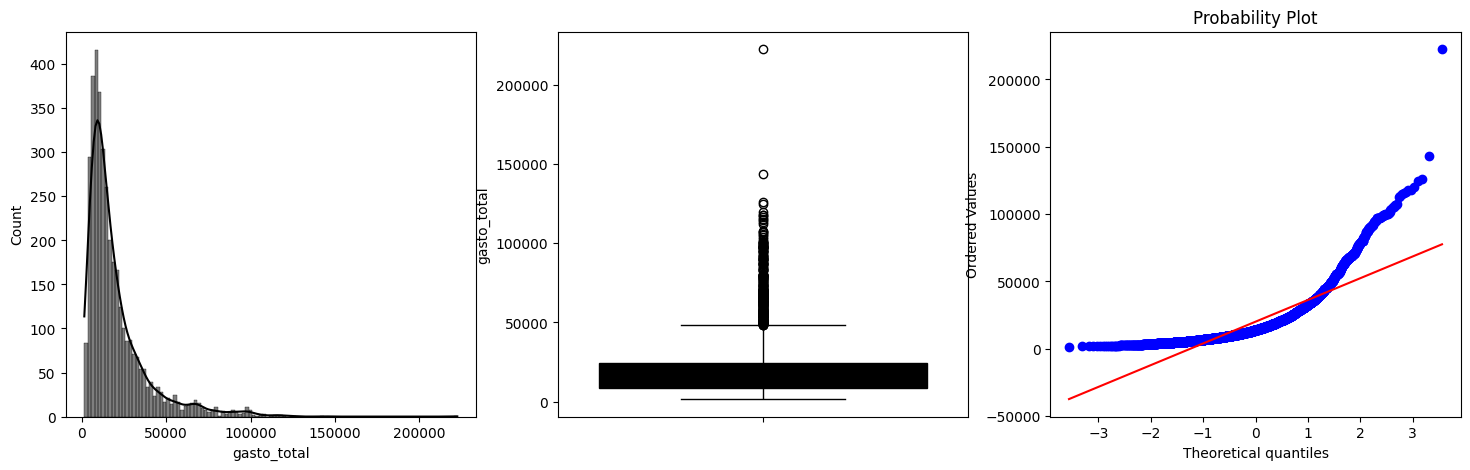

In [26]:
# Graficar la distribucion de los gastos totales
plot_distribution(gastos_data, 'gasto_total')